# Quick example to fit a baseline

Signal is not standardized in rampy contrary to Spectra.jl, so behavior of splines can differ for the same smoothing coefficients.

In [1]:
%pylab inline
import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import gcvspline
import rampy

Populating the interactive namespace from numpy and matplotlib


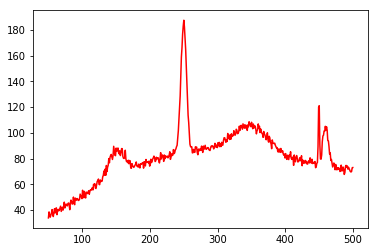

In [2]:
nb_points  =500
x = np.linspace(50, 500, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y_obs = p1 + p2 + p3 + p4 + p5 + noise +bkg

plot(x,y_obs,"r-")

# Different baseline examples

In [13]:
spectrum = np.transpose(np.vstack((x,y_obs)))

# need to define some fitting regions for the spline
roi = np.array([[0,100],[200,220],[280, 290],[420,430],[480,500]])


ycalc_gcvspl, base_gcvspl = rampy.baseline(spectrum,roi,'gcvspline',s=10.0 )
ycalc_rub, base_rub = rampy.baseline(spectrum,roi,'rubberband')
ycalc_als, base_als = rampy.baseline(spectrum,roi,'als')

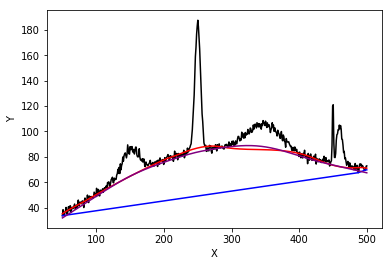

In [14]:
plot(spectrum[:,0],spectrum[:,1],"k-",label="Raw")
plot(base_gcvspl[:,0],base_gcvspl[:,1],"r-",label="gcvspline baseline")
plot(base_rub[:,0],base_rub[:,1],"b-",label="rubberband baseline")
plot(base_als[:,0],base_als[:,1],"-",color="purple",label="als baseline")

xlabel("X")
ylabel("Y")

In [15]:
help(rampy.baseline)

Help on function baseline in module rampy.baseline:

baseline(spectre, bir, method, **kwargs)
    This function allows subtracting a baseline under the spectra
    spectre is a spectrum or an array of spectra constructed with the spectrarray function
    bir contains the Background Interpolation Regions, it must be a n x 2 dimensiona rray
    
    Inputs
    ------
    
        Spectre: Array with 2 or more columns. First column contain x axis, subsequent columns contains y values. If using gcvspline, only treat a spectrum at a call, third column can contain known ese.
    
        bir: an Array containing the regions of interest, organised per line. for instance, roi = np.array([[100., 200.],[500.,600.]]) will define roi between 100 and 200 as well as between 500 and 600,.
    
        methods:
    
    "linear": linear baseline, with spectre = array[x y];
    "hori': constant baseline, fitted at the minimum in the provided region of spectra. Splinesmooth in this case is the 1/2 exten